In [2]:
## This notebook for batcheffect analysis
setwd("C:/Users/nitish.mishra/Desktop/HS-Radha")
library("doParallel")
detectCores()
myLoad <- champ.load(directory = getwd())
myNorm <- champ.norm()

In [3]:
load("Radha_HS_idat.Rdata")

In [17]:
t.BMIQ <- t(myNorm)
data <- as.matrix(t.BMIQ)
batch <- as.numeric(gsub("Group", "", myLoad$pd$Sample_Group))

In [19]:
data[1:5,1:5]

,cg00000957,cg00001349,cg00001583,cg00002028,cg00002719
1-HS7081,0.7236581,0.7579588,0.1150930,0.06141414,0.10197578
2-HS7088,0.7658849,0.7695054,0.1757331,0.07902116,0.06883925
3-HS7089,0.8130033,0.7657520,0.1125553,0.09003948,0.05103149
4-HS7090,0.8455580,0.7733980,0.1693509,0.07248274,0.05553874
5-HS7091,0.8659273,0.7287170,0.1840321,0.06931992,0.05652068


In [37]:
library(gPCA)
set.seed(101)
out<-gPCA.batchdetect(x=data,batch=batch,center=FALSE,nperm=250)
out$delta ; out$p.val

[1] 0.5891355

[1] 0.128

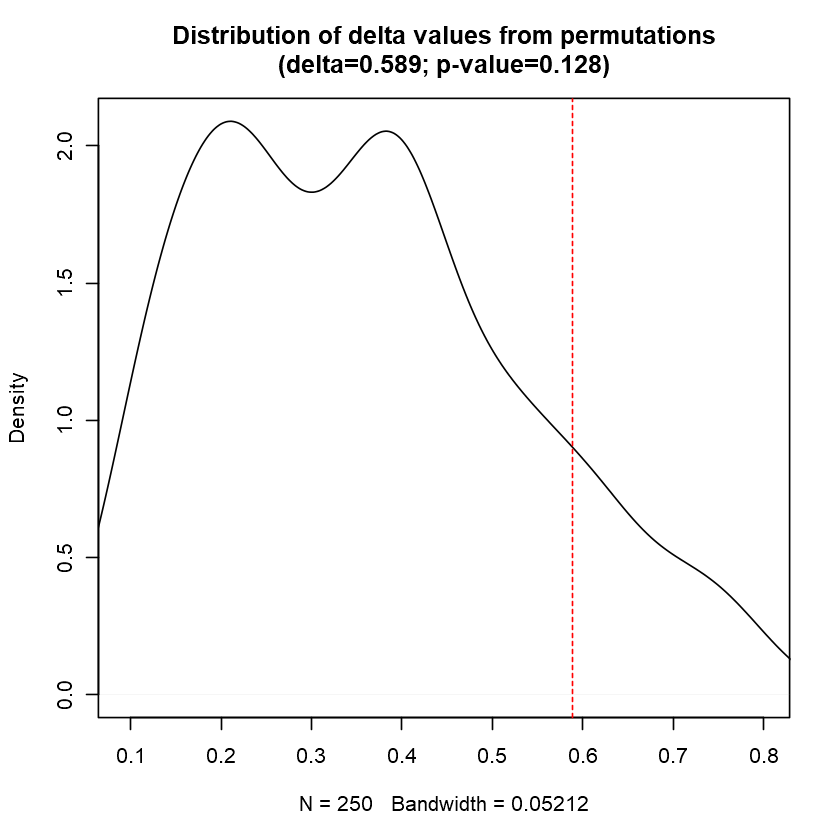

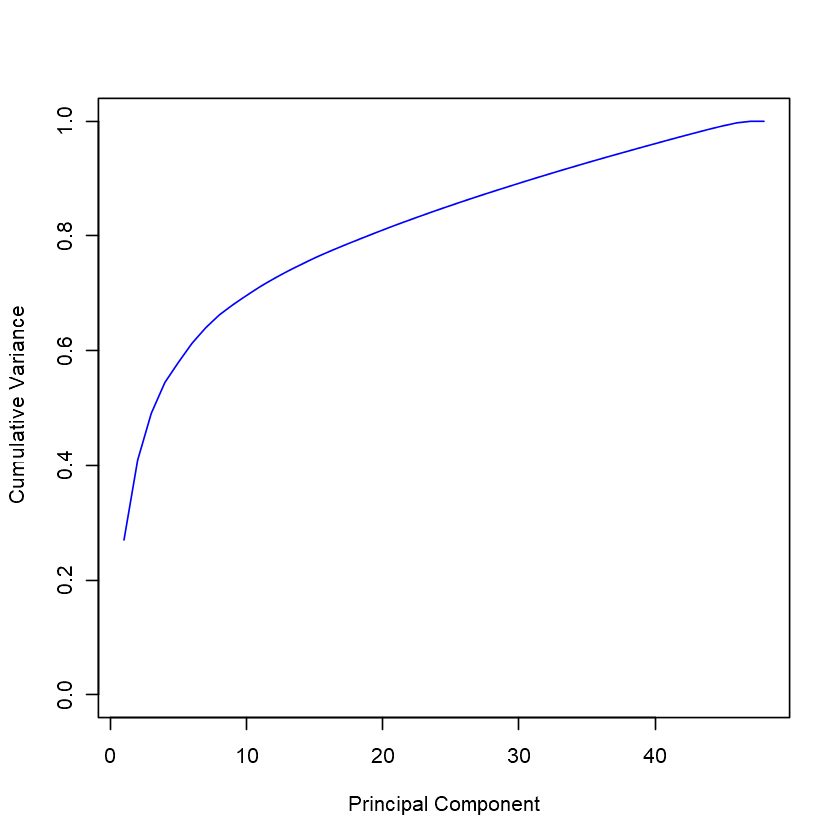

In [38]:
gDist(out)
CumulativeVarPlot(out,ug="unguided",col="blue")

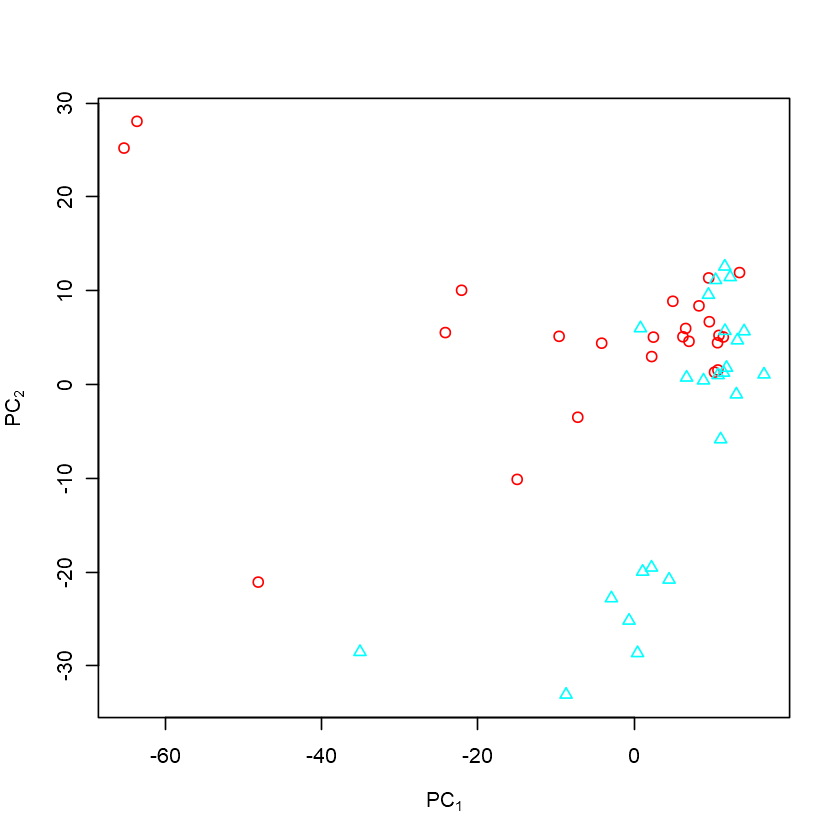

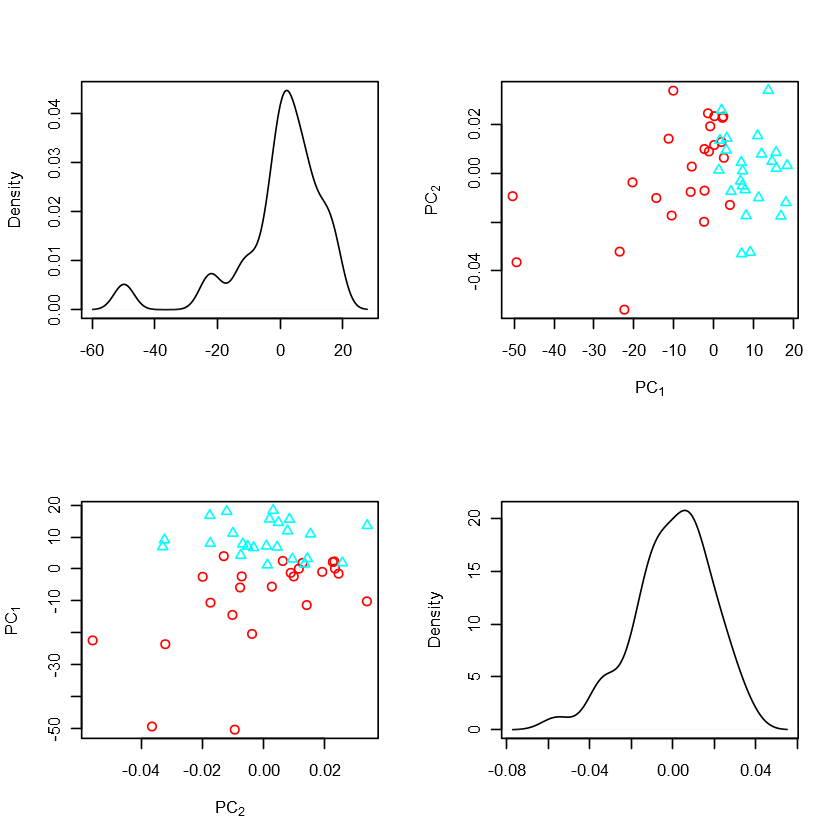

In [39]:
PCplot(out,ug="unguided",type="1v2")
PCplot(out,ug="guided",type="comp",npcs=2)

In [32]:
#### Now running for comBat normalized data
# By using SVA tool
library(sva)
batch <- myLoad$pd$Sample_Group
modcombat = model.matrix(~1, data=myLoad$pd)
combat_edata = ComBat(dat=myNorm, batch=batch, mod=modcombat, par.prior=TRUE, prior.plots=FALSE)
data1 <- t(combat_edata)
set.seed(101)
out<-gPCA.batchdetect(x=data1,batch=batch,center=FALSE,nperm=250)
out$delta ; out$p.val

[1] 0.1211634

[1] 0.956

In [40]:
combat_edata[1:5,1:5]

,1-HS7081,2-HS7088,3-HS7089,4-HS7090,5-HS7091
cg00000957,0.76202174,0.79561005,0.83308928,0.85898417,0.87518644
cg00001349,0.77616529,0.78622776,0.78295686,0.78962005,0.75068199
cg00001583,0.11247802,0.16780760,0.11016253,0.16198436,0.17537979
cg00002028,0.06866405,0.09184776,0.10635593,0.08323843,0.07907384
cg00002719,0.10577107,0.07319833,0.05569354,0.06012411,0.06108934


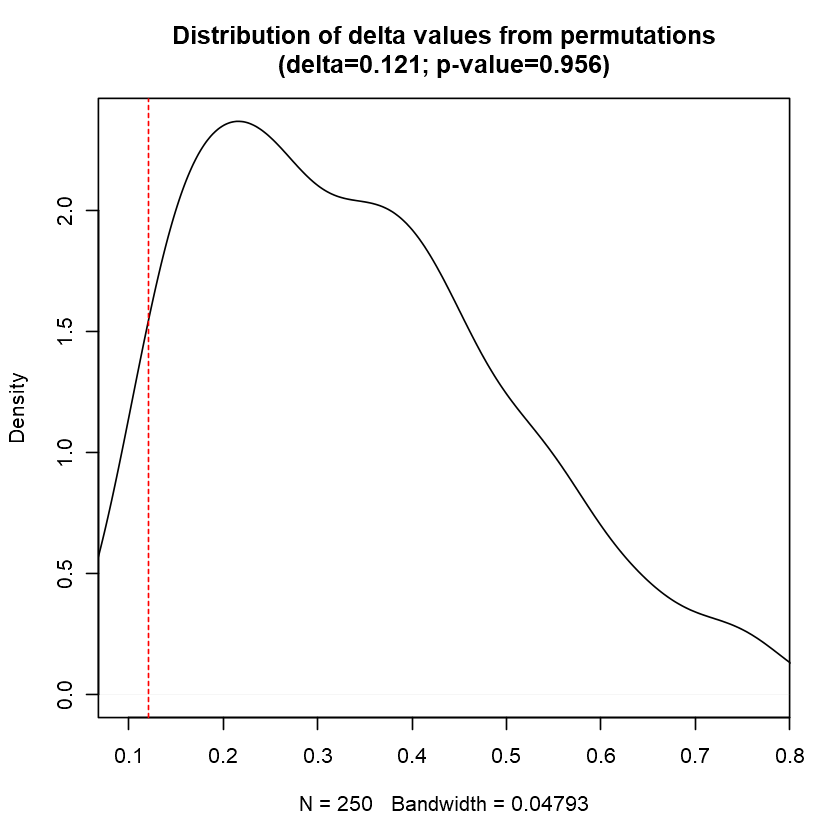

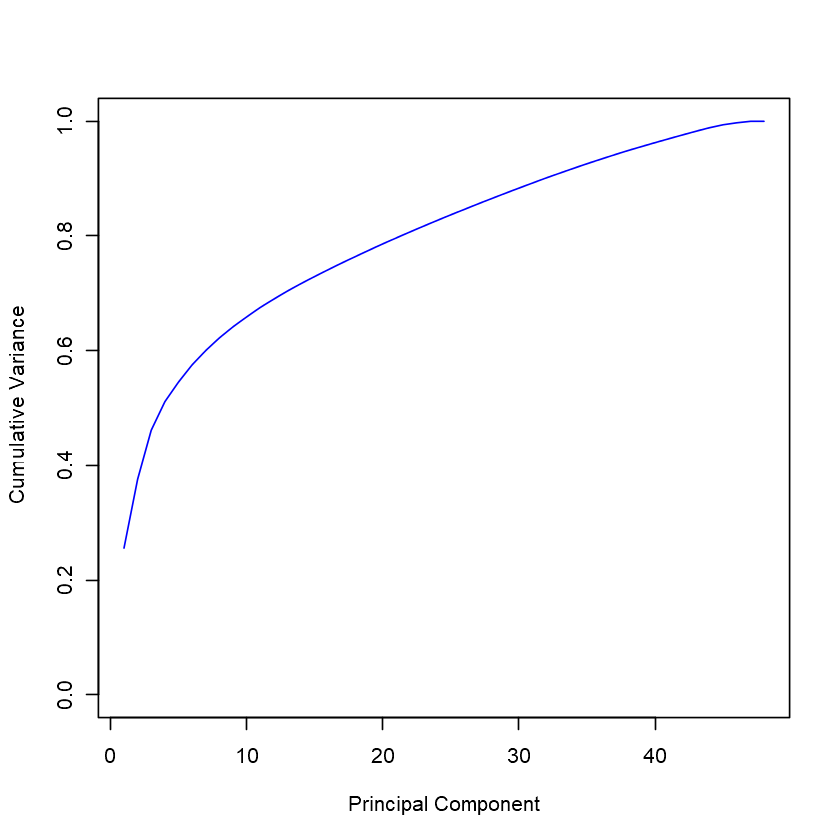

In [36]:
gDist(out)
CumulativeVarPlot(out,ug="unguided",col="blue")

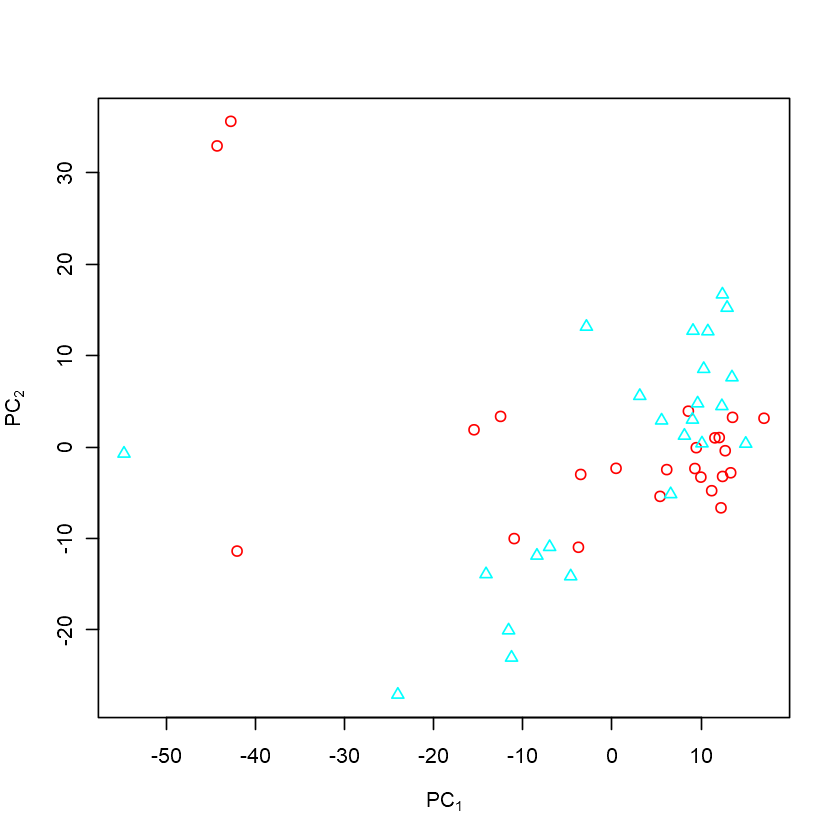

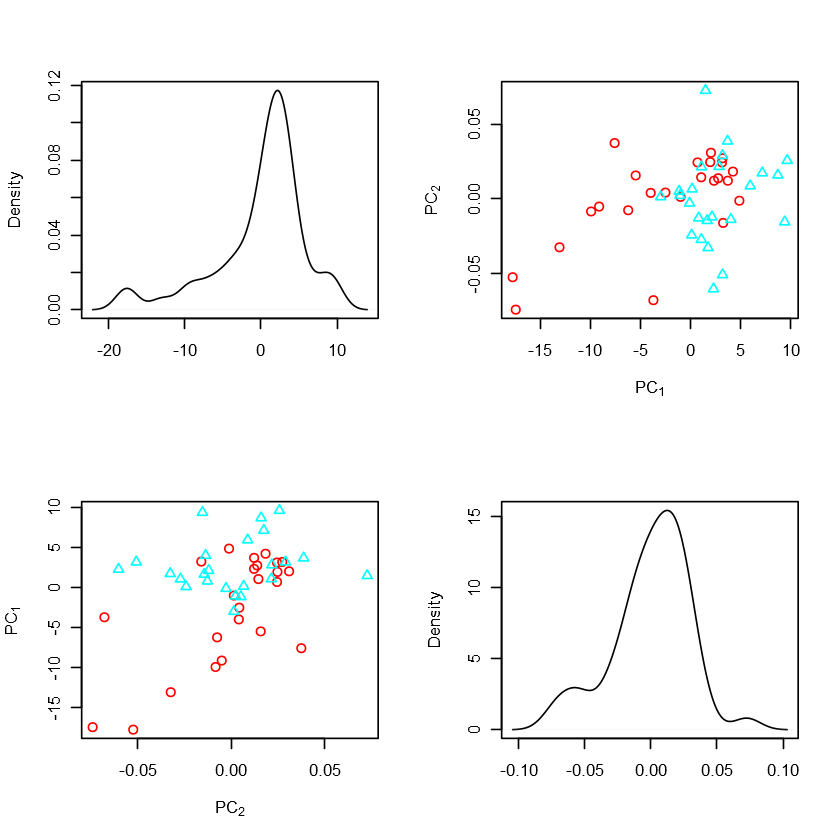

In [35]:
PCplot(out,ug="unguided",type="1v2")
PCplot(out,ug="guided",type="comp",npcs=2)